In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.
Сгенерируйте примеры из распределения

In [217]:
chi2 = sts.chi2
df = 10
sample = chi2.rvs(df, size=100)
sample

array([11.62665707,  6.50781705,  7.16916358, 13.66241012, 14.68310186,
        7.08155397,  6.30656894,  2.20814831,  7.03021387,  9.88634063,
       11.38280082,  2.86875049, 17.07957514,  7.57095461,  8.10718122,
       15.64054456, 11.84370003, 14.73796774,  7.88154622, 12.13733478,
       13.24260371,  4.5685852 , 13.22454678,  8.61541997,  5.87322723,
       15.42789242, 10.83562145,  2.83972539, 12.478145  ,  3.75387848,
       16.40336881,  3.74109154,  3.64795202, 23.24076464, 10.32559661,
       10.0784478 ,  5.76537727, 14.29173135,  5.26066644, 23.84919387,
        8.95872905, 14.83368489,  5.25870145, 17.91267037, 13.73041067,
        9.5651455 ,  6.68869142, 12.31315828,  5.96044283,  7.54865851,
       10.70570342, 10.97291845,  7.65150664, 10.22698088, 11.151479  ,
        5.22049917,  6.26480942,  6.86298373, 13.55216475, 10.22322918,
       10.62539009, 19.15539992, 14.63581383, 14.10153879,  6.36055219,
        7.66436952, 14.5639792 ,  5.95884423,  5.1833693 , 13.14

In [218]:
chi2.stats(df, moments='mvsk')

(array(10.), array(20.), array(0.89442719), array(1.2))

Постройте гистограмму выборки и теоретическую плотность распределения

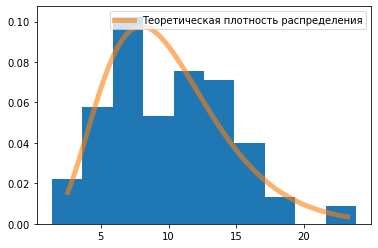

In [219]:
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99,df),100)
plt.hist(sample, density=True)
plt.plot(x, chi2.pdf(x,df), lw=5, alpha=0.6, label='Теоретическая плотность распределения')
plt.legend()

In [220]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

10.138681463342913
20.807627504754496


Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

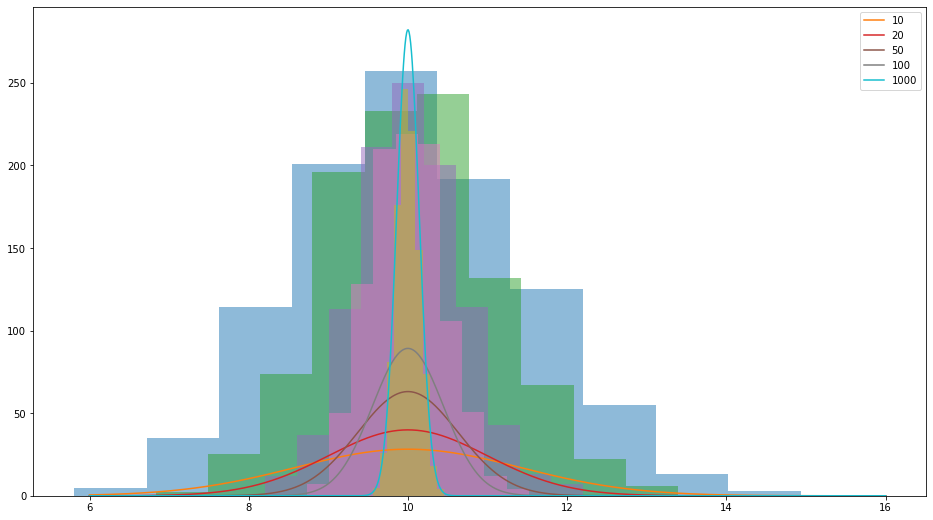

In [221]:
x = np.linspace(6,16, 1000)
plt.figure(figsize=(16,9))
for N in [10, 20, 50, 100, 1000]:
    norm_rv = sts.norm(loc=chi2.mean(df,loc=0, scale=1), scale=chi2.std(df, loc=0, scale=1) / np.sqrt(N))
    pdf = norm_rv.pdf(x)*100
    means = []
    for i in range(1000):
         means.append(np.mean(chi2.rvs(df, size=N)))
    plt.hist(means, alpha=0.5)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=1)

plt.legend(['10', '20', '50', '100', '1000'])
plt.show()


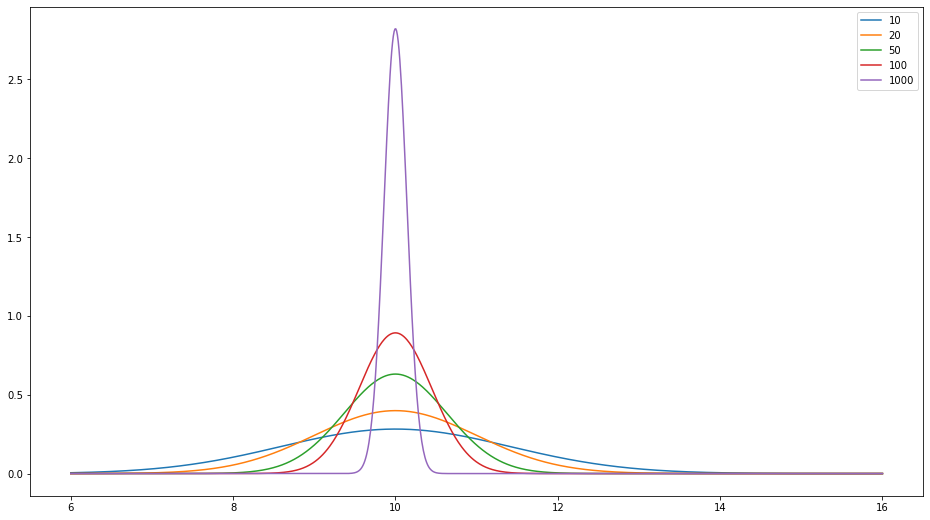

In [222]:
x = np.linspace(6, 16, 1000)
plt.figure(figsize=(16,9))
for N in [10, 20, 50, 100, 1000]:
    norm_rv = sts.norm(loc=chi2.mean(df,loc=0, scale=1), scale=chi2.std(df, loc=0, scale=1) / np.sqrt(N))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=1)

plt.legend(['10', '20', '50', '100', '1000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ:

Работает хорошо только при больших значениях выборки

Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [223]:
url = 'https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
data=pd.read_csv(url)


In [224]:
df1 = data[(data['total day calls'])&(data['churn']==True)]
df2 = data[(data['total day calls'])&(data['churn']==False)]

In [225]:
df1['total day calls'].sem()

1.39466415660278

In [226]:
df2['total day calls'].sem()

0.5252630874255383

In [227]:
print("Доверительный интервал [{}, {}]".format(np.mean(df1['total day calls']) - 2 * df1['total day calls'].std() / np.sqrt (251), np.mean(df1['total day calls']) + 2 * df1['total day calls'].std() / np.sqrt(251)))

Доверительный интервал [97.8441378222526, 103.42279444866372]


In [228]:
print("Доверительный интервал [{}, {}]".format(np.mean(df2['total day calls']) - 2 * df2['total day calls'].std() / np.sqrt (1405), np.mean(df2['total day calls']) + 2 * df2['total day calls'].std() / np.sqrt(1405)))

Доверительный интервал [99.28328165433042, 101.38433400403257]


In [229]:
from statsmodels.stats.weightstats import _zconfint_generic
_zconfint_generic(df2['total day calls'], df2['total day calls'].std(), 0.95, 'larger')
_zconfint_generic(df1['total day calls'], df1['total day calls'].std(), 0.95, 'larger')

(10      173.344086
 15      103.344086
 21      125.344086
 41      121.344086
 54      119.344086
            ...    
 3287    155.344086
 3291    155.344086
 3301    149.344086
 3320    137.344086
 3322    141.344086
 Name: total day calls, Length: 251, dtype: float64,
 inf)